## 1 - Introdução

#### Objetivo: Criar um modelo preditivo que classifique pacientes adultos tendo transtorno do espectro autístico ou não.
#### Modelo de Machine Learning utilizado: Decision Tree e Random Forest - (modelo supervisionado e de classificação)


- O Transtorno do Espectro do Autismo (TEA ou ASD) é uma condição de neurodesenvolvimento caracterizado por deficiente interação e comunicação social, padrões estereotipados e repetitivos de comportamento e desenvolvimento intelectual irregular.  Está associada a custos significativos de assistência médica, e o diagnóstico precoce pode reduzi-los significativamente. Infelizmente, os tempos de espera para um diagnóstico de TEA são longos e os procedimentos não são rentáveis. O impacto econômico do autismo e o aumento do número de casos de TEA em todo o mundo revelam uma necessidade urgente do desenvolvimento de métodos de triagem fáceis de implementar e eficazes. Portanto, é iminente uma triagem ASD acessível em tempo e eficiente, para ajudar os profissionais de saúde e informar os indivíduos se eles devem buscar um diagnóstico clínico formal. O rápido crescimento no número de casos de TEA em todo o mundo exige conjuntos de dados relacionados a características comportamentais. No entanto, esses conjuntos de dados são raros, dificultando a realização de análises completas para melhorar a eficiência, sensibilidade, especificidade e precisão preditiva do processo de triagem de TEA. Atualmente, existem conjuntos de dados de autismo muito limitados associados à clínica ou à triagem e a maioria deles é de natureza genética. Por isso, propomos um novo conjunto de dados relacionado à triagem do autismo em adultos que continha 20 recursos a serem utilizados para análises adicionais, especialmente na determinação de traços autísticos influentes e na melhoria da classificação dos casos de TEA. Neste conjunto de dados, registramos dez características comportamentais (AQ-10-Adult) mais dez características individuais que provaram ser eficazes na detecção de casos de TEA a partir de controles na ciência do comportamento.


- Cada coluna do dataset pode ser descrita por:
A1_Score a A10_Score, age, gender, ethnicity, jundice, austim, contry_of_res, used_app_before, result, age_desc, relation,    Class/ASD.          


- O conjunto de dados original foi baixado do repositório UCI ML:
https://archive.ics.uci.edu/ml/datasets/Autism+Screening+Adult

## 2 - Importando os pacotes

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipy_table as tbl
import warnings
import sklearn.metrics as metrics

from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

warnings.filterwarnings("ignore")
sns.set_style ("whitegrid")
%matplotlib inline

#### Abrindo o arquivo em formato arff

In [29]:
data = arff.loadarff('Autism-Adult-Data.arff')
df = pd.DataFrame(data[0])
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',...,b'f',b'White-European',b'no',b'no',"b""'United States'""",b'no',6.0,"b""'18 and more'""",b'Self',b'NO'
1,b'1',b'1',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',...,b'm',b'Latino',b'no',b'yes',b'Brazil',b'no',5.0,"b""'18 and more'""",b'Self',b'NO'
2,b'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',...,b'm',b'Latino',b'yes',b'yes',b'Spain',b'no',8.0,"b""'18 and more'""",b'Parent',b'YES'
3,b'1',b'1',b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'1',...,b'f',b'White-European',b'no',b'yes',"b""'United States'""",b'no',6.0,"b""'18 and more'""",b'Self',b'NO'
4,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',...,b'f',b'?',b'no',b'no',b'Egypt',b'no',2.0,"b""'18 and more'""",b'?',b'NO'


## 3 - Data wrangling

#### Convertendo as colunas para uft-8

In [30]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [31]:
df['A1_Score'] = df['A1_Score'].str.decode('utf-8') 
df['A2_Score'] = df['A2_Score'].str.decode('utf-8') 
df['A3_Score'] = df['A3_Score'].str.decode('utf-8') 
df['A4_Score'] = df['A4_Score'].str.decode('utf-8') 
df['A5_Score'] = df['A5_Score'].str.decode('utf-8') 
df['A6_Score'] = df['A6_Score'].str.decode('utf-8') 
df['A7_Score'] = df['A7_Score'].str.decode('utf-8') 
df['A8_Score'] = df['A8_Score'].str.decode('utf-8') 
df['A9_Score'] = df['A9_Score'].str.decode('utf-8') 
df['A10_Score'] = df['A10_Score'].str.decode('utf-8') 
df['gender'] = df['gender'].str.decode('utf-8') 
df['ethnicity'] = df['ethnicity'].str.decode('utf-8') 
df['jundice'] = df['jundice'].str.decode('utf-8') 
df['austim'] = df['austim'].str.decode('utf-8')
df['contry_of_res'] = df['contry_of_res'].str.decode('utf-8') 
df['used_app_before'] = df['used_app_before'].str.decode('utf-8') 
df['age_desc'] = df['age_desc'].str.decode('utf-8') 
df['relation'] = df['relation'].str.decode('utf-8') 
df['Class/ASD'] = df['Class/ASD'].str.decode('utf-8') 

In [32]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6.0,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6.0,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,'18 and more',?,NO


#### Verificando as métricas

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           704 non-null object
A2_Score           704 non-null object
A3_Score           704 non-null object
A4_Score           704 non-null object
A5_Score           704 non-null object
A6_Score           704 non-null object
A7_Score           704 non-null object
A8_Score           704 non-null object
A9_Score           704 non-null object
A10_Score          704 non-null object
age                702 non-null float64
gender             704 non-null object
ethnicity          704 non-null object
jundice            704 non-null object
austim             704 non-null object
contry_of_res      704 non-null object
used_app_before    704 non-null object
result             704 non-null float64
age_desc           704 non-null object
relation           704 non-null object
Class/ASD          704 non-null object
dtypes: float64(2), object(19)
memory usage: 63.3+ KB


#### Tratando as missing values

In [34]:
df.isnull().values.any()

True

In [35]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [36]:
#substituindo os valores ? por NaN
data = df.replace('?', np.nan, inplace=True)
data=df
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6.0,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6.0,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2.0,'18 and more',NaN,NO


In [37]:
df.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

In [38]:
for column_name in df.columns:
    print(
        """{column_name}:
        {unique_values}""".format(
            column_name=column_name,
            unique_values=", ".join(
                map(str, df[column_name].unique())
            ),
        )
    )
    
print(
    """
NUMBER OF EXAMPLES:{}
NUMBER OF COLUMNS: {}
""".format(
        df.shape[0], df.shape[1]
    )
)

A1_Score:
        1, 0
A2_Score:
        1, 0
A3_Score:
        1, 0
A4_Score:
        1, 0
A5_Score:
        0, 1
A6_Score:
        0, 1
A7_Score:
        1, 0
A8_Score:
        1, 0
A9_Score:
        0, 1
A10_Score:
        0, 1
age:
        26.0, 24.0, 27.0, 35.0, 40.0, 36.0, 17.0, 64.0, 29.0, 33.0, 18.0, 31.0, 30.0, 34.0, 38.0, 42.0, 43.0, 48.0, 37.0, 55.0, 50.0, 53.0, 20.0, 28.0, 21.0, 383.0, 47.0, 32.0, 44.0, nan, 19.0, 58.0, 45.0, 22.0, 39.0, 25.0, 23.0, 54.0, 60.0, 41.0, 46.0, 56.0, 61.0, 59.0, 52.0, 49.0, 51.0
gender:
        f, m
ethnicity:
        White-European, Latino, nan, Others, Black, Asian, 'Middle Eastern ', Pasifika, 'South Asian', Hispanic, Turkish, others
jundice:
        no, yes
austim:
        no, yes
contry_of_res:
        'United States', Brazil, Spain, Egypt, 'New Zealand', Bahamas, Burundi, Austria, Argentina, Jordan, Ireland, 'United Arab Emirates', Afghanistan, Lebanon, 'United Kingdom', 'South Africa', Italy, Pakistan, Bangladesh, Chile, France, China, Au

In [39]:
df["relation"].value_counts()

Self                          522
Parent                         50
Relative                       28
Others                          5
'Health care professional'      4
Name: relation, dtype: int64

In [40]:
df["ethnicity"].value_counts()

White-European       233
Asian                123
'Middle Eastern '     92
Black                 43
'South Asian'         36
Others                30
Latino                20
Hispanic              13
Pasifika              12
Turkish                6
others                 1
Name: ethnicity, dtype: int64

#### "Dropando" as colunas indesejadas

In [41]:
df.drop("relation", axis=1, inplace=True)
df.drop("ethnicity", axis=1, inplace=True)
df.drop("contry_of_res", axis=1, inplace=True)
df.drop("age_desc", axis=1, inplace=True)

#### Substituindo as idades faltantes com a média

In [42]:
df['age'] = df['age'].fillna(df['age'].median())

In [43]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
jundice            0
austim             0
used_app_before    0
result             0
Class/ASD          0
dtype: int64

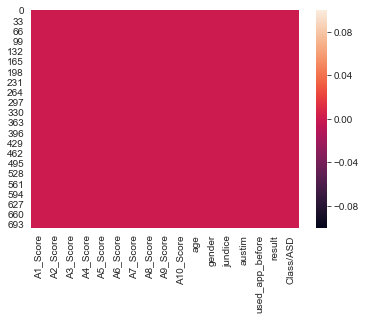

In [44]:
sns.heatmap (df.isnull())

In [45]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,used_app_before,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,no,no,no,6.0,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,no,yes,no,5.0,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,yes,yes,no,8.0,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,no,yes,no,6.0,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,no,no,no,2.0,NO


In [46]:
df.shape

(704, 17)

#### Substituindo as variáveis de classicação por 1 e 0.

In [47]:
df["gender"] = [1 if each == "m" else 0 for each in df["gender"]] 
df["jundice"] = [1 if each == "yes" else 0 for each in df["jundice"]]
df["austim"] = [1 if each == "yes" else 0 for each in df["austim"]]
df["used_app_before"] = [1 if each == "yes" else 0 for each in df["used_app_before"]]
df["Class/ASD"] = [1 if each == "YES" else 0 for each in df["Class/ASD"]]
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,used_app_before,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,0,0,0,6.0,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,0,1,0,5.0,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,1,1,0,8.0,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,0,1,0,6.0,0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,0,0,0,2.0,0


#### Renomeando a variável target

In [48]:
df.rename (columns={"Class/ASD":"ASD"}, inplace=True)

In [49]:
df.describe()

,age,gender,jundice,austim,used_app_before,result,ASD
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,29.690341,0.521307,0.098011,0.129261,0.017045,4.875000,0.268466
std,16.484593,0.499901,0.297541,0.335728,0.129533,2.501493,0.443476
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,27.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000
75%,35.000000,1.000000,0.000000,0.000000,0.000000,7.000000,1.000000
max,383.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000


#### Convertendo o pandas para numérico

In [50]:
df = df.apply(pd.to_numeric, errors='coerce')
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,used_app_before,result,ASD
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.690341,0.521307,0.098011,0.129261,0.017045,4.875000,0.268466
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.484593,0.499901,0.297541,0.335728,0.129533,2.501493,0.443476
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,1.000000,0.000000,0.000000,0.000000,7.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000


## 4 - Data analysis

0    515
1    189
Name: ASD, dtype: int64

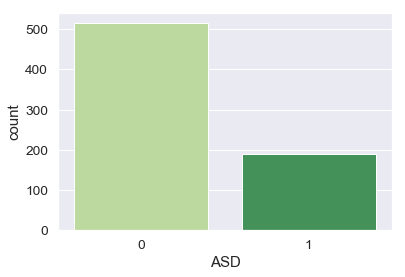

In [120]:
sns.countplot ("ASD", data=df, palette="YlGn")
df["ASD"].value_counts()

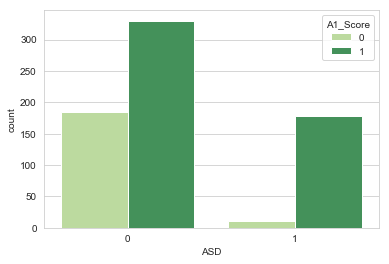

In [52]:
sns.countplot ("ASD", data=df,hue="A1_Score", palette="YlGn")

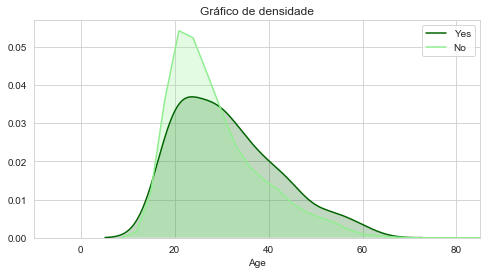

In [55]:
plt.figure(figsize=(8,4))
sns.kdeplot(df["age"][df.ASD == 1], color="darkgreen", shade=True)
sns.kdeplot(df["age"][df.ASD == 0], color="lightgreen", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Gráfico de densidade')
plt.xlabel ("Age")
plt.xlim(-10,85)
plt.show()

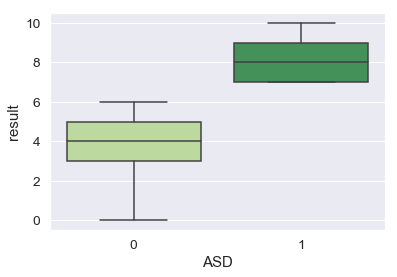

In [201]:
sns.boxplot (x="ASD", y="result", data=df, palette="YlGn")

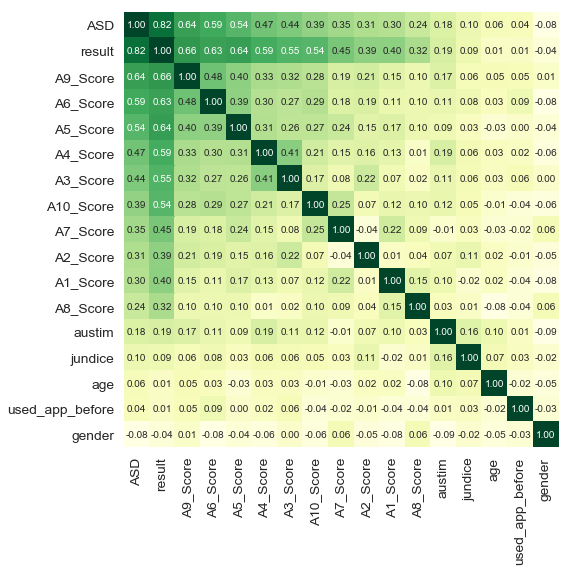

In [57]:
k = 17 #número de variáveis para o heatmap
corrmat = df.corr() #correlação
cols = corrmat.nlargest(k, 'ASD')['ASD'].index
tab = np.corrcoef(df[cols].values.T) 

plt.figure(figsize=(8,8))
sns.set(font_scale=1.25)
sns.heatmap(tab, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values, cmap="YlGn")
plt.show()

## 5 - Machine learning (Decision Tree and Random Forest)

#### Dividindo os dados entre treino e test

In [179]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jundice', 'austim', 'used_app_before', 'result', 'ASD'],
      dtype='object')

#### Observação

Aqui vai uma observação fundamental. Eu rodei o modelo com TODAS as variáveis preditivas e a acurácia foi de 100%.
Voltei e manipulei as variáveis para entender o que acontecia. A "result" é uma variável que não pode ser usada no modelo, pois
ele sempre resulta numa acurácia 100% de ASD. Essa variável foi colocada no dataset como uma variável preditiva e não preditora, e não sei por qual motivo, pois não tenho contato com a equipe desenvolvedora. 

Para fazer o teste, eu "dropei" todas as variáveis, menos a A1_score e a "result".

X = df[['A1_Score', "result"]]

y = df["ASD"]

A acurácia TAMBÉM foi de 100%, o que inviabiliza a utilização dessa coluna. Então eu a "dropei" e utilizei as demais variáveis que são
mais confiáveis, e auxiliam melhor o modelo. 

Isso pode ser também confirmado pela tabela cruzada abaixo, como a "result" é referente ao resultado de fato, e não é uma variável preditiva. 

In [209]:
table = pd.crosstab(df['ASD'],df['result'])
print (table)

result  0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0
ASD                                                                     
0         14    33    74   110   131    83    70     0     0     0     0
1          0     0     0     0     0     0     0    57    55    47    30


In [180]:
X = df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jundice', 'austim', 'used_app_before']]

y = df["ASD"]

In [181]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.3, random_state=101)

In [182]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(492, 15)
(492,)
(212, 15)
(212,)


#### Aplicando o modelo Decision Tree e fazendo a predição

In [183]:
dtree = DecisionTreeClassifier()

In [184]:
dtree.fit (X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [185]:
prediction = dtree.predict(X_test)

In [186]:
from sklearn.metrics import classification_report, confusion_matrix

In [187]:
print (confusion_matrix(y_test, prediction))

[[143  16]
 [  7  46]]


In [188]:
print (classification_report (y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       159
           1       0.74      0.87      0.80        53

   micro avg       0.89      0.89      0.89       212
   macro avg       0.85      0.88      0.86       212
weighted avg       0.90      0.89      0.89       212



#### Aplicando o modelo Random Forest e fazendo a predição

In [189]:
rfc = RandomForestClassifier (n_estimators=500)

In [190]:
rfc.fit (X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [191]:
prediction_rfc = rfc.predict (X_test)

In [192]:
print (confusion_matrix(y_test, prediction_rfc))

[[158   1]
 [  2  51]]


In [195]:
print (classification_report (y_test, prediction_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       159
           1       0.98      0.96      0.97        53

   micro avg       0.99      0.99      0.99       212
   macro avg       0.98      0.98      0.98       212
weighted avg       0.99      0.99      0.99       212



#### A acurácia do modelo passou de 89% com decision Tree para 99% com Random Forest.

## 6 - Resultados

### Resultados do modelo que teve melhor eficácia (Random Forest).

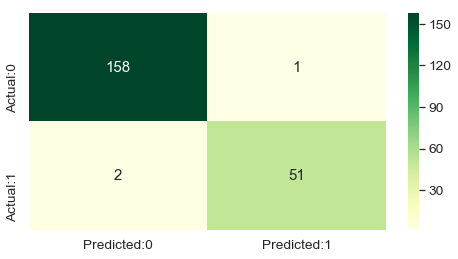

In [197]:
cm=confusion_matrix(y_test,prediction_rfc)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,4))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGn")

In [198]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [199]:
results = [
    ['The acuracy of the model = TP+TN/(TP+TN+FP+FN) = ', (TP+TN)/float(TP+TN+FP+FN)],
    ['The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN))],
    ['Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN)],
    ['Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP)],
    ['Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP)],
    ['Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN)],
    ['Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity)],
    ['Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/(specificity)],    
]
tbl.make_table(results)

The acuracy of the model = TP+TN/(TP+TN+FP+FN) =,0.9858
The Missclassification = 1-Accuracy =,0.0142
Sensitivity or True Positive Rate = TP/(TP+FN) =,0.9623
Specificity or True Negative Rate = TN/(TN+FP) =,0.9937
Positive Predictive value = TP/(TP+FP) =,0.9808
Negative predictive Value = TN/(TN+FN) =,0.9875
Positive Likelihood Ratio = Sensitivity/(1-Specificity) =,153.0000
Negative likelihood Ratio = (1-Sensitivity)/Specificity =,0.0380


### Visualizando a correlação entre as variáveis

Coeficiente de correlação:

+1 = forte correlação positiva

0 = não há correlação

-1 = forte correlação negativa

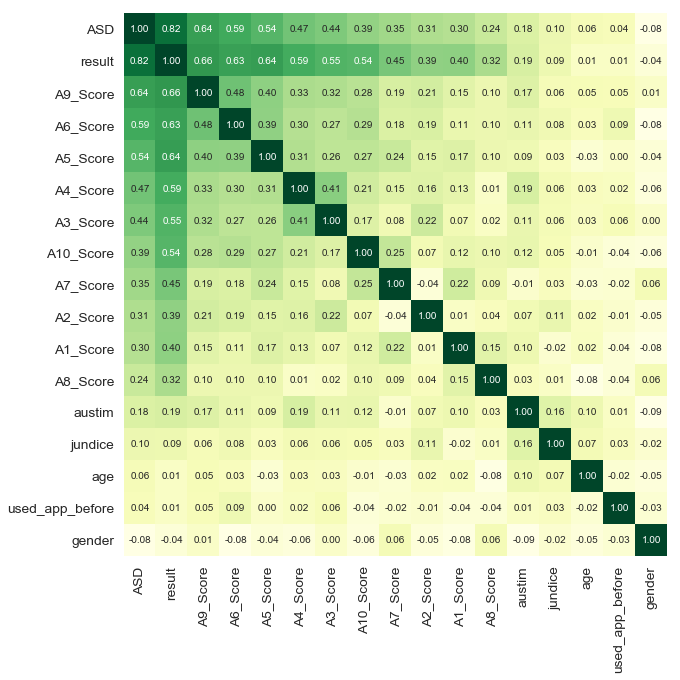

In [216]:
k = 17 #número de variáveis para o heatmap
corrmat = df.corr() #correlação
cols = corrmat.nlargest(k, 'ASD')['ASD'].index
cm = np.corrcoef(df[cols].values.T) #confusion matrix

plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values, cmap="YlGn")
plt.show()

#### Curva ROC - True positive, false positive 

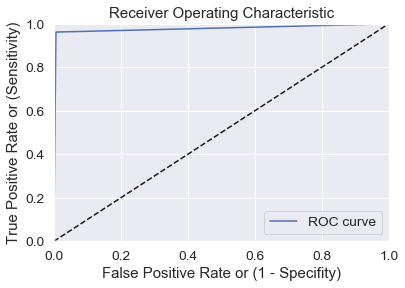

In [220]:
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, prediction_rfc)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

## 7 - Conclusão

- A variável "result" e a classe ASD tiveram a maior correlação.


- A variável "result" foi aparentemente colocada no dataset como uma variável preditiva e não preditora, já que essa última é a classe ASD (autism spectrum desorder). No entanto, verificando os dados pela tabela cruzada, e pela manipulação das colunas ao dividir os dados para treino e teste, ficou evidente que é referente ao resultado de fato, pois todas as pessoas com resultado de 7.0, e acima disso, estão com ASD. Por isso a variável "result" foi deletada para a criação do modelo.


- O modelo obteve uma acurácia de 89 % utilizando o Decision Tree (árvore de decisão). A acurácia foi otimizada com a utilização do Random Forest(floresta aleatória), que obteve uma acurácia de 98,58%.


- A sensitividade é muito importante nesse tipo de análise, pois é o verdadeiro positivo. Sua acurácia foi de 96,23%.
